<a href="https://colab.research.google.com/github/AsadBukhari886/foundations_of_artificial_neural_network/blob/main/Class_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


In [ ]:
# class0 = np.random.randn(250, 2) + np.array([2, 2])

# class1 = np.random.randn(250, 2) + np.array([7, 7])

# X = np.vstack([class0, class1]).astype(np.float32)
# y = np.array([0]*250 + [1]*250, dtype=np.float32).reshape(-1, 1)

In [ ]:
X, y = make_moons(n_samples=500, noise=0.10, random_state=42)
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)


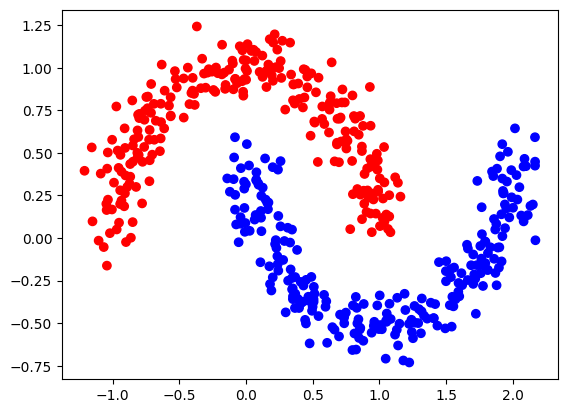

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap = 'bwr_r')

In [ ]:
def BCEloss(y_hat, y):
  eps = 1e-6
  return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat +eps))

def sigmoid(z):
  return 1 / (1 + np.exp(-z))


2

In [ ]:
class Neuron:
  def __init__(self, input_feature):
    self.weight = np.random.randn(1, input_feature)
    self.bias = 0

  def forward(self, X):
    z = np.dot(X, self.weight.T) + self.bias
    output = sigmoid(z)
    return output

  def backward(self, X, y, lr, epochs):
     for i in range(epochs):
      y_hat = self.forward(X)
      loss = BCEloss(y_hat, y)

      dL= (y_hat - y) / X.shape[0]
      dW = dL.T @ X
      db = np.sum(dL)

      #update rule
      self.weight = self.weight - lr * dW
      self.bias = self.bias - lr * db

      print(loss)


model = Neuron(input_feature = X.shape[1])
model.backward(X, y, lr = 0.1, epochs=1000)


1.0462643850329885
0.5866022370331985
0.5743597969941802
0.5690158318668441
0.564311930419345
0.5596906262320309
0.5551280671505487
0.5506227712182615
0.5461739831371307
0.5417809736115637
0.537443016997203
0.5331593908202976
0.5289293761262598
0.5247522578616705
0.5206273252404954
0.5165538720890124
0.5125311971689153
0.5085586044788862
0.5046354035351176
0.5007609096313256
0.4969344440788351
0.49315533442734744
0.4894229146670251
0.48573652541254636
0.48209551406979606
0.4784992349858735
0.4749470495830977
0.47143832647770034
0.4679724415838915
0.464548778203982
0.4611667271052395
0.4578256865841472
0.45452506251872393
0.4512642684095493
0.448042725410129
0.444859862347212
0.4417151157316613
0.4386079297604598
0.4355377563104118
0.4325040549240861
0.42950629278852226
0.4265439447072056
0.42361649306579274
0.42072342779205246
0.41786424631046354
0.41503845349189256
0.412245561598755
0.40948509022604307
0.4067565662385831
0.4040595237048683
0.40139350382779493
0.39875805487260807
0.396

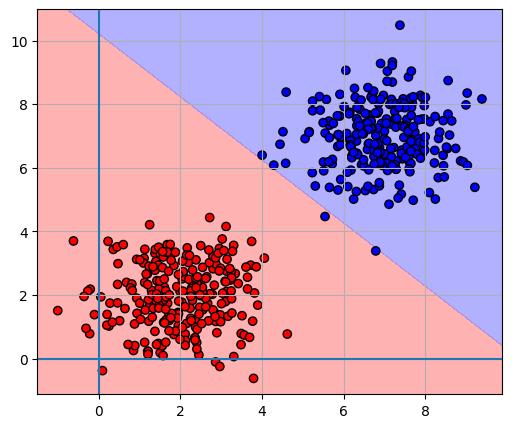

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.forward(grid)
Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=0, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()